<a href="https://colab.research.google.com/github/GKS07/The-Sparks-Foundation/blob/main/Percentage_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting the percentage of a students based on the no. of study hours


In [1]:
# importing the important libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# importing the data
url = "http://bit.ly/w-data"

data = pd.read_csv(url)
print("data is imported.")

data is imported.


In [3]:
# understanding the data
data.shape 

(25, 2)

So we have 25 rows and 2 coulmns.

In [4]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


here  we have the hours that a student study and what percentage he scores in examination. so score is our target variable. now lets plot a scatter chart to see the relation between this two variable.

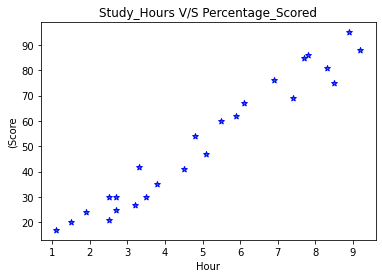

In [5]:
plt.scatter(x = data.Hours, y = data.Scores, marker = '*', edgecolors = 'blue')
plt.title("Study_Hours V/S Percentage_Scored")
plt.xlabel("Hour")
plt.ylabel("(Score")
plt.show()

Now lets, seperate our target variable and dependent variable.

In [6]:
# preparing the data for our linear model
x = data.iloc[ :, :-1].values # is our dependent variable hours of study
y = data.iloc[ :, 1].values# is our target variable percentage scores

**Lets, create our Linear Model** for this problem before this we split our data into traning and test set. trainig set is for traning the model and test set is for testing the accuracy of the model.

In [7]:
# spliting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
# Creating the Linear Model
linear_model = LinearRegression() # creating the object of the linear Regression
linear_model.fit(x_train,y_train) # fitting the traning data to the linear model
y_pred = linear_model.predict(x_test) # predicting the results for test data

In [9]:
#comparing the actual and predicted results
comp = pd.DataFrame({'Real': y_test, 'Predicted': y_pred})
comp

,Real,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


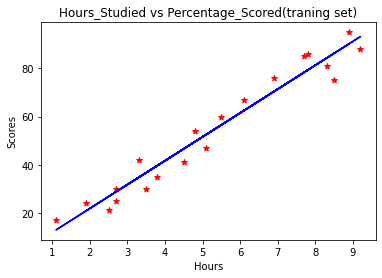

In [10]:
# visualizing the traning data

plt.scatter(x_train, y_train, color = 'red', marker= '*')
plt.plot(x_train,linear_model.predict(x_train), color = 'blue')
plt.title("Hours_Studied vs Percentage_Scored(traning set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

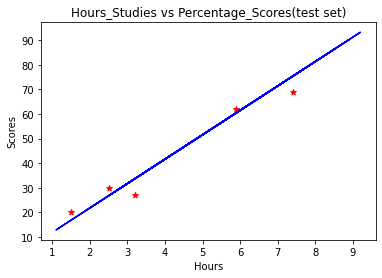

In [11]:
#visualizing the test data

plt.scatter(x_test, y_test, color = 'red', marker='*')
plt.plot(x_train,linear_model.predict(x_train), color = 'blue')
plt.title("Hours_Studies vs Percentage_Scores(test set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


##Evaluating the model

In [12]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [13]:
# predicting the score of student who study 9.25 hrs/day.
hrs = [[9.25]]
pred = linear_model.predict(hrs)
print("student who study",hrs[0],"hours per day are likely to get",pred[0],"percentage")

student who study [9.25] hours per day are likely to get 93.69173248737539 percentage
